In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Core Mission

1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
2. 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

### 1번 문제

In [3]:
# 관련파일 가져오기

avengers_df = pd.read_csv("charcters_stats.csv")
avengers_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [11]:
a = avengers_df.sort_values(["Total"],ascending=False)    #Total를 기준으로 내림차순 정렬
a

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575
...,...,...,...,...,...,...,...,...,...
462,Renata Soliz,good,1,1,1,1,0,1,5
137,Captain Mar-vell,good,1,1,1,1,0,1,5
136,Captain Epic,good,1,1,1,1,0,1,5
466,Ripcord,good,1,1,1,1,0,1,5


In [12]:
# 이름출력하기! 
a["Name"].head(1) 

361    Martian Manhunter
Name: Name, dtype: object

#### => 1번 문제의 정답 = Martian Manhunter

### 2번 문제

In [16]:
# Alignment로 분류하기

avengers_df.groupby(["Alignment"])["Name"].count()  #각 성격별 몇개의 캐릭터가 있는지 알 수 있음

Alignment
bad        165
good       432
neutral     11
Name: Name, dtype: int64

In [18]:
# 분포알아보기

avengers_df.groupby(['Alignment']).mean()   #각 성격별 평균 능력치를 알 수 있음

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


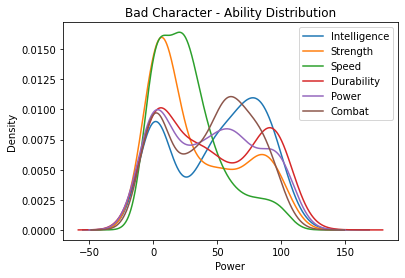

In [30]:
# 그래프 활용하기: kdeplot 이용하기

avengers_df['Intelligence'][avengers_df.Alignment == 'bad'].plot(kind='kde')
avengers_df['Strength'][avengers_df.Alignment == 'bad'].plot(kind='kde')
avengers_df['Speed'][avengers_df.Alignment == 'bad'].plot(kind='kde')
avengers_df['Durability'][avengers_df.Alignment == 'bad'].plot(kind='kde')
avengers_df['Power'][avengers_df.Alignment == 'bad'].plot(kind='kde')
avengers_df['Combat'][avengers_df.Alignment == 'bad'].plot(kind='kde')

plt.legend(['Intelligence','Strength','Speed','Durability','Power','Combat'])
plt.xlabel("Power")
plt.title("Bad Character - Ability Distribution")

plt.show()


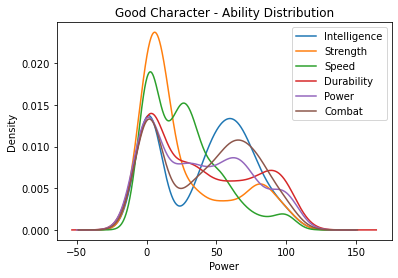

In [31]:
avengers_df['Intelligence'][avengers_df.Alignment == 'good'].plot(kind='kde')
avengers_df['Strength'][avengers_df.Alignment == 'good'].plot(kind='kde')
avengers_df['Speed'][avengers_df.Alignment == 'good'].plot(kind='kde')
avengers_df['Durability'][avengers_df.Alignment == 'good'].plot(kind='kde')
avengers_df['Power'][avengers_df.Alignment == 'good'].plot(kind='kde')
avengers_df['Combat'][avengers_df.Alignment == 'good'].plot(kind='kde')

plt.legend(['Intelligence','Strength','Speed','Durability','Power','Combat'])
plt.xlabel("Power")
plt.title("Good Character - Ability Distribution")

plt.show()

## Bonus Mission


1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.

2. 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.

3. 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.
이 과제는 핵심 임무 이후에 진행되어야 한다.

### 1번 문제

In [52]:
# 파일 불러오기

company = pd.read_csv("marvel_characters_info.csv")
company.head()

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0


In [53]:
# 회사를 넣기 위해서 index를 이름으로 변경

avengers = avengers_df.set_index(["Name"])      
avengers

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Name,,,,,,,,
3-D Man,good,50,31,43,32,25,52,233
A-Bomb,good,38,100,17,80,17,64,316
Abe Sapien,good,88,14,35,42,35,85,299
Abin Sur,good,50,90,53,64,84,65,406
Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...
Yellowjacket,good,88,10,12,28,12,14,164
Yellowjacket II,good,50,10,35,28,31,28,182
Ymir,good,50,100,27,100,83,28,388


In [54]:
company_df = company.set_index(["Name"])
company_df

,ID,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
Name,,,,,,,,,,
A-Bomb,0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
Abe Sapien,1,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
Abin Sur,2,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
Abomination,3,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
Abraxas,4,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,729,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
Ymir,730,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
Yoda,731,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0


In [58]:
# index를 기준으로 company_df["Publisher"]부분만 붙이기  (해당하는 이름이 있는 경우에만 적용)

new_avengers_df = pd.merge(left = avengers, right = company_df["Publisher"], left_index = True, right_index = True, how = "inner")

new_avengers_df

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
Name,,,,,,,,,
A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
Abin Sur,good,50,90,53,64,84,65,406,DC Comics
Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics
...,...,...,...,...,...,...,...,...,...
Yellowjacket,good,88,10,12,28,12,14,164,Marvel Comics
Yellowjacket II,good,50,10,35,28,31,28,182,Marvel Comics
Ymir,good,50,100,27,100,83,28,388,Marvel Comics


In [62]:
# publisher별로 그룹핑하기

new_avengers_df.groupby(["Publisher"])["Total"].sum()

Publisher
ABC Studios            664
DC Comics            43591
Dark Horse Comics     1575
Hanna-Barbera            5
HarperCollins           30
Icon Comics            592
Image Comics           918
Marvel Comics        85104
Microsoft              425
NBC - Heroes          2670
Shueisha               963
Sony Pictures          398
SyFy                   944
Team Epic TV            25
Universal Studios      237
Wildstorm               10
Name: Total, dtype: int64

In [71]:
# 결과값 확인하기

print(new_avengers_df[new_avengers_df["Publisher"]=='HarperCollins']["Total"].sum())
print(new_avengers_df[new_avengers_df["Publisher"]=='Icon Comics']["Total"].sum())
print(new_avengers_df[new_avengers_df["Publisher"]=='Sony Pictures']["Total"].sum())
print(new_avengers_df[new_avengers_df["Publisher"]=='SyFy']["Total"].sum())

30
592
398
944


### 2번 문제

In [83]:
# alignment별로 그룹핑 -> 각 그룹별 능력치 합의 평균 = 능력치 총합 / 그룹별 캐릭터수

avengers_df.groupby(["Alignment"])["Alignment"].count()    #그룹별 캐릭터수
avengers_df.groupby(['Alignment'])["Total"].sum()          #그룹별 능력치 총합

avengers_df.groupby(['Alignment'])["Total"].mean()         #그룹별 능력치 total 평균

Alignment
bad        247.212121
good       214.990741
neutral    355.363636
Name: Total, dtype: float64

In [110]:
# 열세가 good이므로 neutral -> good에 가담

cnt = avengers_df.groupby(["Alignment"])["Alignment"].count() 
cnt_notbad = cnt["good"] + cnt["neutral"]

t = avengers_df.groupby(["Alignment"])["Total"].sum()
sum_notbad = t["good"] + t["neutral"]

mean_notbad = sum_notbad / cnt_notbad
print(mean_notbad, sum_notbad, cnt_notbad)
mean_notbad

218.4762979683973 96785 443


218.4762979683973

#### 결과: bad = 247  VS  good + neutral = 218 -------> bad WINS !